In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emnist

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np

import random

from matplotlib import pyplot as plt

from emnist import list_datasets
from emnist import extract_training_samples


In [4]:
# carica il dataset emnist
images, labels = extract_training_samples('byclass')

# Stampa i primi 10 elementi
# for i in range(10):
#     print(f'Immagine {i+1}:')
#     print(images[i])  # Stampa l'array dell'immagine
#     print(f'Label {i+1}: {labels[i]}')  # Stampa la label corrispondente
#     print('---------------------------------')

In [ ]:
# Stampa info sul dataset
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Unique labels:", np.unique(labels).shape[0])
print("Number of unique labels:", len(np.unique(labels)))

# prendo solo le immagini dei caretteri che mi interessano da tutto il dataset di emnist

# 0: 0
# 1: 1
# 2: 2
# 3: 3
# 4: 4
# 14: E
# 28: S
# 33: X
# 54: s
# 59: x

#my_labels=[0, 1, 2, 3, 4, 14, 28, 33, 54, 59] # vengono salvati le labels dei caratteri: 'S', 'E', 'X', '0', '1', '2', '3', '4' (con s & x piccole e grandi)
#lookup = { '0': 0, '1':1, '2':2, '3':3, '4':4, '14':5, '28':6, '33': 7, '54':8, '59':9 } # nuove labels assegnate ad ogni carattere
#my_labels=[0, 1, 2, 3, 4, 14, 28, 33] # vengono salvati le labels dei caratteri: 'S', 'E', 'X', '0', '1', '2', '3', '4'
#lookup = { '0': 0, '1':1, '2':2, '3':3, '4':4, '14':5, '28':6, '33': 7} # nuove labels assegnate ad ogni carattere
my_labels=[1, 2, 3, 4, 14, 28, 33] # vengono salvati le labels dei caratteri: 'S', 'E', 'X', '0', '1', '2', '3', '4'
lookup = {'1':0, '2':1, '3':2, '4':3, '14':4, '28':5, '33': 6} # nuove labels assegnate ad ogni carattere

indices=[]
new_images=[]
new_labels=[]

for i in range(len(labels)):
  if labels[i] in my_labels:
    indices.append(i) # salvo gli indici di tutte le rappresentazioni in emnist del carattere con label in 'my_labels'

# nello specifico: in emnist esistono diverse rappresentazioni dello stesso carattere (ipoteticamente, una per ogni modo in cui è possibile scrivere quel carattere a mano)
# Ognuna ha la stessa label. Quindi, facendo una ricerca per labels all'interno del dataset ottengo tutte le rappresentazioni(immagini) di quel carattere.

for j in range(len(indices)):
  new_images.append(images[indices[j]])
  new_labels.append(lookup[str(labels[indices[j]])])

# converto images_i e labels_i da list a np_array e sovrascrivo le vecchie variabili
# new_images sarà composto sia dalle immagini selezionate da emnist che dalle immagini del dataset artificiale
# new_images = np.concatenate((art_images, new_images), axis=0)
# new_labels = np.concatenate((art_labels, new_labels), axis=0)
new_images = np.array(new_images)
new_labels = np.array(new_labels)

print("Images shape:", new_images.shape)
print("Labels shape:", new_labels.shape)
print("Unique labels:", np.unique(new_labels).shape[0])
print("Number of unique labels:", len(np.unique(new_labels)))


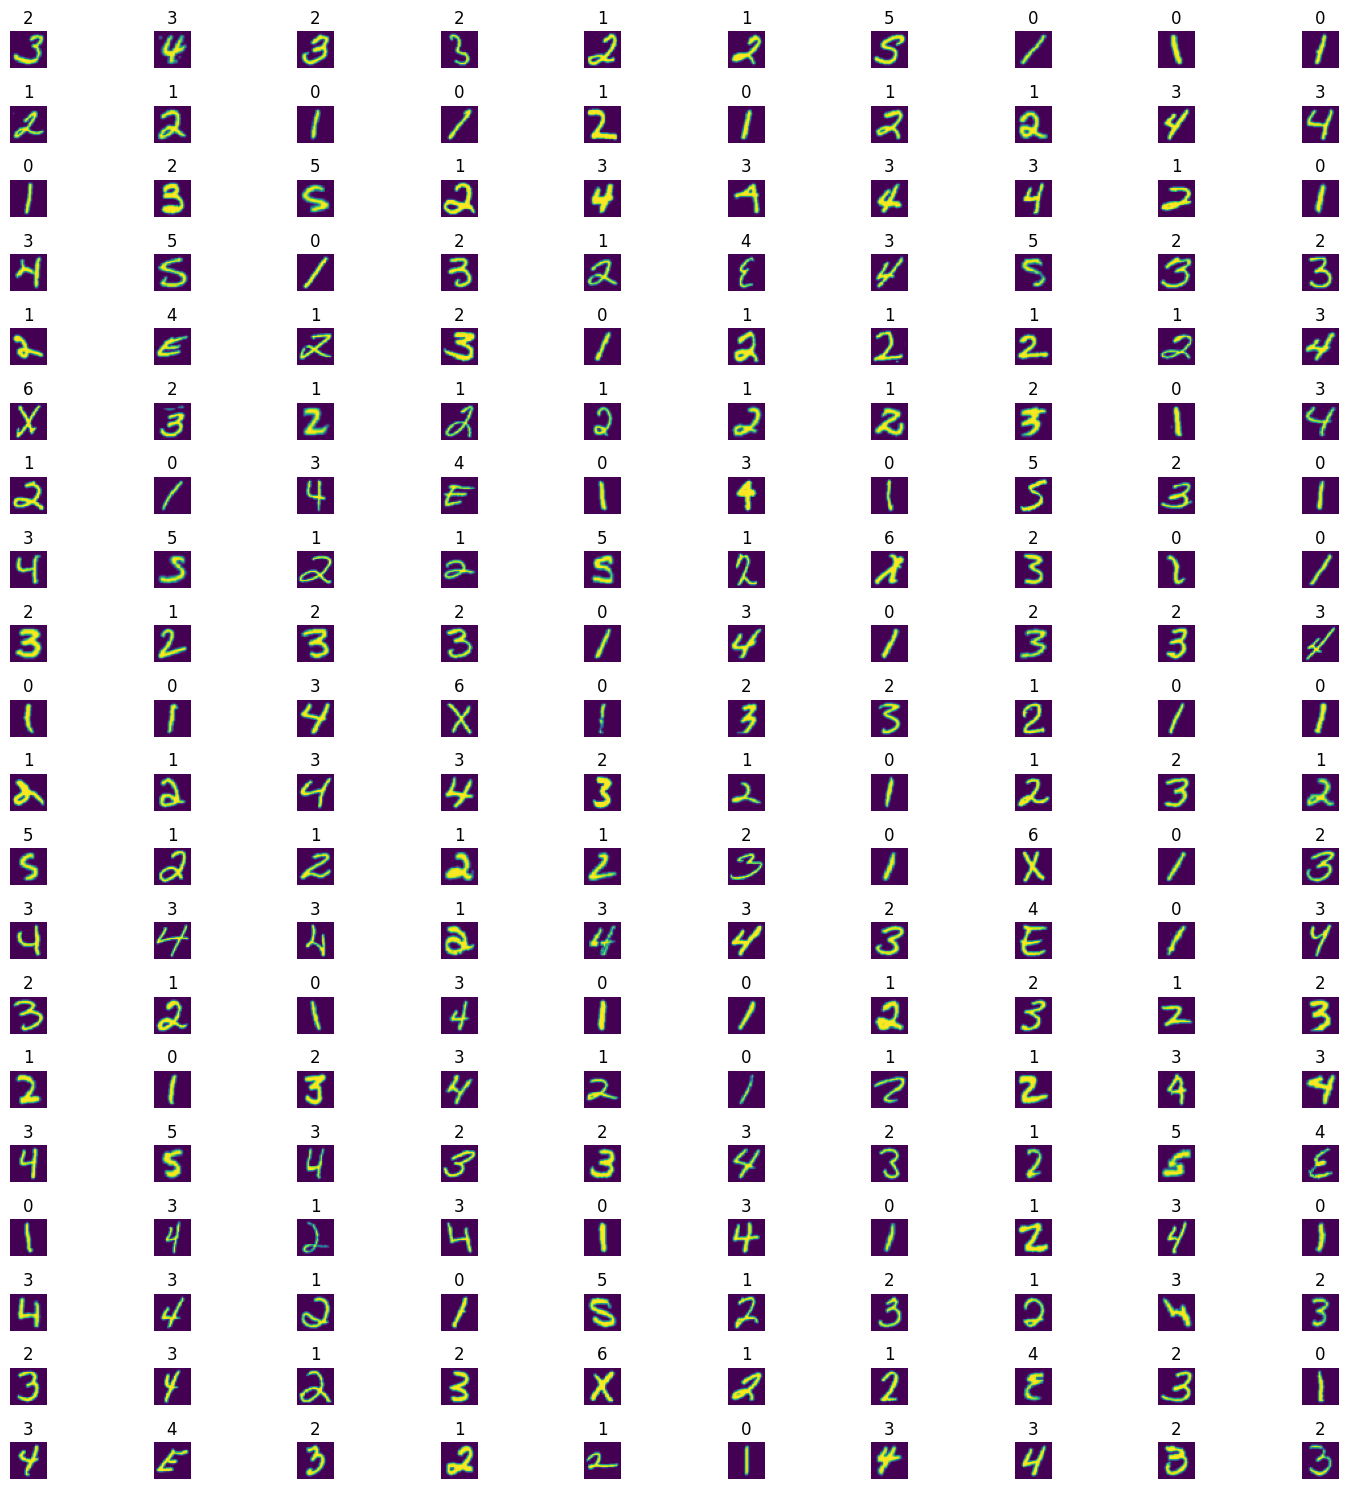

In [6]:
# Plot some sample images
num_samples_to_plot = 200
num_rows = num_samples_to_plot // 10
num_cols = 10

plt.figure(figsize=(15, 15))  # Regolato il figsize per una migliore visualizzazione

for i in range(num_samples_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)  # Configura la posizione del sottoplot
    plt.imshow(new_images[i])  # Utilizzo cmap='gray' per le immagini in scala di grigi
    plt.title(f'{new_labels[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.axis('off')

plt.tight_layout()  # Aggiunge il layout compatto tra i sottoplot
plt.show()

In [ ]:
# Normalize images to the range [0, 1]:
# calcola i valori minimi e massimi presenti nei dati, quindi normalizza i valori dei pixel in modo che siano nell'intervallo [0, 1].
# Alla fine dell'esecuzione di questo codice, images_normalized conterrà le immagini normalizzate, dove i valori dei pixel sono scalati nell'intervallo [0, 1].
feature_vector_length = 784
#scaler = MinMaxScaler()
#images_normalized = scaler.fit_transform(images.reshape(-1, feature_vector_length)) # le immagini vengono trasformate da una matrice 3D (28*28*1) a una 2D (784*1).
# Questo passaggio è necessario perchè MinMaxScaler lavora con matrici bidimensionali

images_normalized = new_images.astype("float32")/255
new_labels = new_labels.astype("float32")
#print(images_normalized[0])

#images_normalized = images_normalized.reshape(-1, 28, 28, 1) # le immagini vengono ripristinate alla forma di partenza 3D (28*28*1) - può anche non essere fatto

print("max pixel values : ",np.max(images_normalized))
print("min pixel values: ",np.min(images_normalized))

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images_normalized, new_labels, test_size=0.34, random_state=100
) # test_size è la proporzioni di dati da allocare per il test_set (20%).
# random_state imposta il seed per il generatore di numeri casuali

print(train_images.shape)
print(train_labels.shape)

In [ ]:
# Build the CNN model
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 7
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test loss: {score[0]}\nTest Accuracy: {score[1]}")

# Save the model
model.save("/content/drive/MyDrive/Colab Notebooks/PROGETTO_AI/handwritten_model")

In [ ]:
# Scegli un numero casuale di immagini da testare
num_images_to_test = 10

# Estrai casualmente un insieme di indici delle immagini dal set di test
random_image_indices = random.sample(range(len(test_images)), num_images_to_test)

# Loop attraverso le immagini selezionate casualmente
for i in random_image_indices:
    test_image = test_images[i]  # Estrai l'immagine di test
    true_label = int(test_labels[i])  # Estrai l'etichetta vera

    # Effettua la predizione con il modello
    prediction = model.predict(np.expand_dims(test_image, axis=0))
    predicted_class = prediction.argmax()  # Estrai l'etichetta predetta

    labels = {5: 'E', 6: 'S', 7: 'X'} # i numeri non contano perchè sono già in ordine
    predicted_label = labels.get(predicted_class, str(predicted_class))

    print("La predizione è:", predicted_label)

    # Visualizza l'immagine di test
    plt.figure()
    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    true_label = labels.get(true_label, str(true_label))
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

MODELLO ANN - OLD

In [ ]:
# Build the ANN model
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), # Flatten è utilizzato per "appiattire" i dati in modo che possano essere collegati a strati densi.
    # flatten è necessario quando si lavora con dati multidimensionali, come immagini, che devono essere trasformati in un vettore unidimensionale
    #Dropout( 0.3, input_shape = (feature_vector_length,)),
    #Dropout( 0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])


model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256 # 128
epochs = 5
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# batch_size: durante ogni ciclo di addestramento verranno prese 128 immagini e le relative etichette alla volta per calcolare un aggiornamento dei pesi della rete.
# epochs = 1: indica che il modello verrà addestrato per un solo ciclo completo attraverso tutti i dati di addestramento.
# validation_split=0.1: indica che il 10% dei dati di addestramento verrà utilizzato come set di convalida per monitorare le prestazioni del modello durante l'addestramento.

# Evaluate the model on the test set
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test loss: {score[0]}\nTest Accuracy: {score[1]}")

model.save("/content/drive/MyDrive/Colab Notebooks/PROGETTO_AI/handwritten_model")
